# Activity: Aggregations

## Introduction

In this activity you will practice using Pandas functionality to work with various aggregations.

This activity will cover the following topics:
- Measure an aggregate statistic over a specific column.
- Measure an aggregate statistic over a specific column of subsets using `groupby()` over one column.
- Measure multiple aggregate statistics over a specific column of subsets using `groupby()` over one column.
- Measure multiple aggregate statistics over a specific column of subsets using `groupby()` over multiple columns.
- Measure multiple aggregate statistics over a specific column of subsets using `groupby()` over multiple columns.
- Take the transpose of a DataFrame.


In [1]:
import pandas as pd

# Data from https://github.com/mwaskom/seaborn-data/blob/2b29313169bf8dfa77d8dc930f7bd3eba559a906/mpg.csv
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/2b29313169bf8dfa77d8dc930f7bd3eba559a906/mpg.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    str    
 8   name          398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data cleaning

In [3]:
## Review of missing values
df[df.isna().any(axis='columns')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [4]:
## Dropping missing values
df = df.dropna()

#### Weight review from main manufacturing countries

In [5]:

weight_usa = df[df["origin"] == "usa"]["weight"].mean()

In [6]:

weight_japan = df[df["origin"] == "japan"]["weight"].max()

#### Aggregation implementation

Asigning minimun and maximun horsepower per cylinder to `weight_by_cylinder` variable.


In [7]:

weight_by_cylinder = df.groupby("cylinders")["horsepower"].aggregate([min, max])

# Exploring with Visualizations

## Activities
- Compare single values against one another.
- Compare multiple values against one another.
- Use different methods to change how you see the data.


## Horsepower per cylinder analysis

- Creating a new column in the DataFrame `df` called `horsepower_per_cylinder`
that gives the value of `horsepower` per `cylinder`.

- Scatter plot of `horsepower_per_cylinder` vs `acceleration` 


<Axes: xlabel='horsepower_per_cylinder', ylabel='acceleration'>

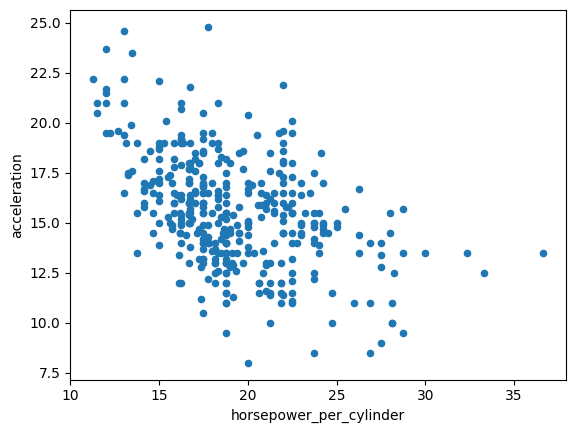

In [17]:

df["horsepower_per_cylinder"] = df["horsepower"]/df["cylinders"]
df.plot.scatter(x="horsepower_per_cylinder", y="acceleration")

#### Horsepower per cylinder and horsepower vs mpg visualization

Single visualization for `horsepower_per_cylinder` and 
`horsepower` are on the y-axis vs `mpg` on the x-axis in a scatter plot.
Make each set of points a different color.


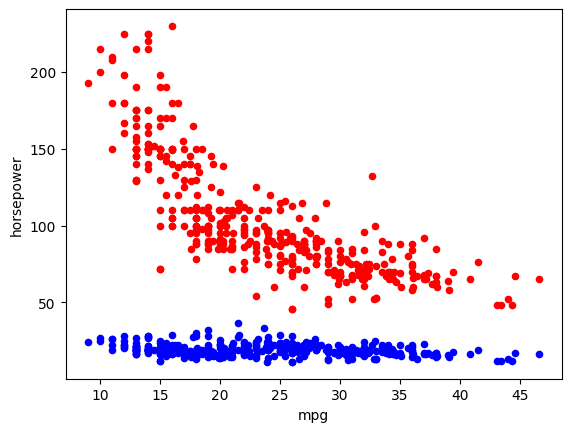

In [18]:
ax = df.plot.scatter(y="horsepower_per_cylinder", x="mpg", color="blue")
ax = df.plot.scatter(y="horsepower", x="mpg", color="red", ax=ax)

#### Histogram for `mpg`

Histogram of the `mpg` column with  ***50*** bins.

Text(0.5, 0, 'Miles Per Gallon')

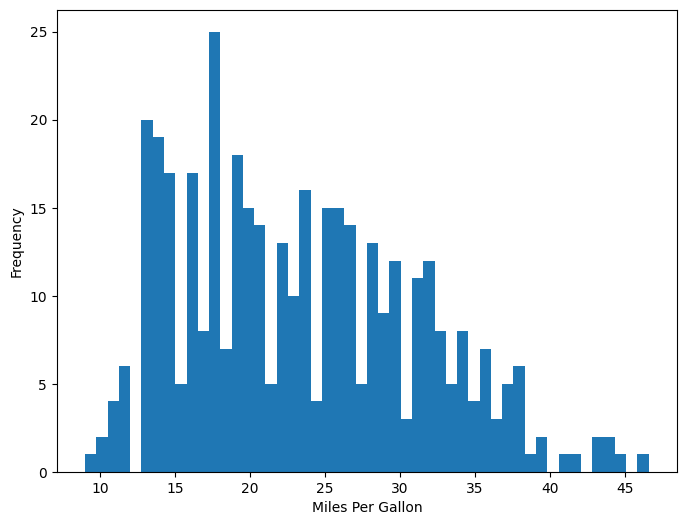

In [12]:
# Your code here

ax = df["mpg"].plot.hist(bins=50, figsize=(8,6))
ax.set_xlabel("Miles Per Gallon")


# Creating Visualizations

## Activities
- Creating individual and multiple box plots in one visualization.
- Creating individual and multiple histograms in one visualization.
- Creating scatter plots.


#### Box plot data visualization

**Range of data set variables**

<Axes: >

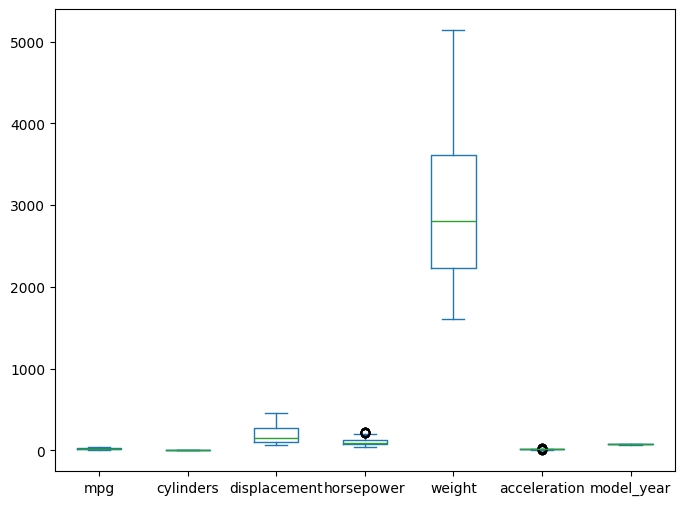

In [ ]:
# Range of dataset variables
df.plot.box(figsize=(8,6))

**Cylinder and model year range**

<Axes: >

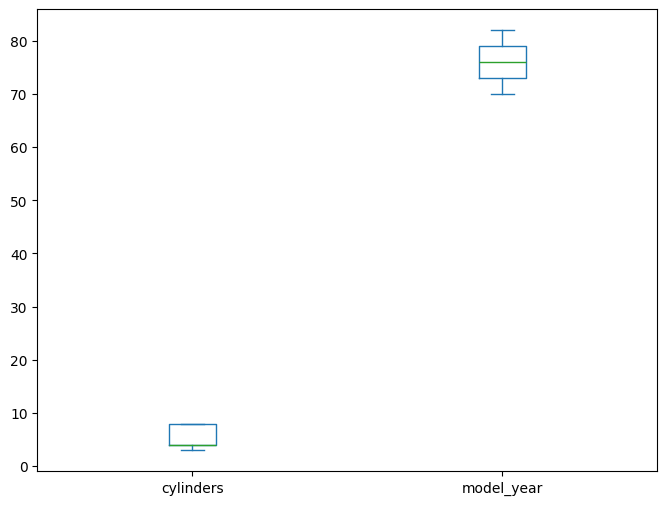

In [40]:
df[['cylinders','model_year']].plot.box(figsize=(8,6))

#### Histogram data visualization

**Acceleration histogram**

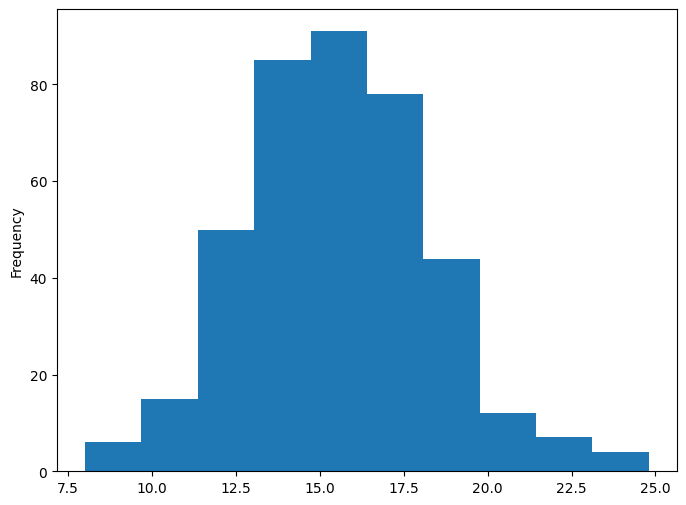

In [41]:
# Your code here

df["acceleration"].plot.hist(figsize=(8,6))
approx_peak_height = 85

#### Scaterplot visualization

**`acceleration` vs `mpg`**

<Axes: xlabel='acceleration', ylabel='mpg'>

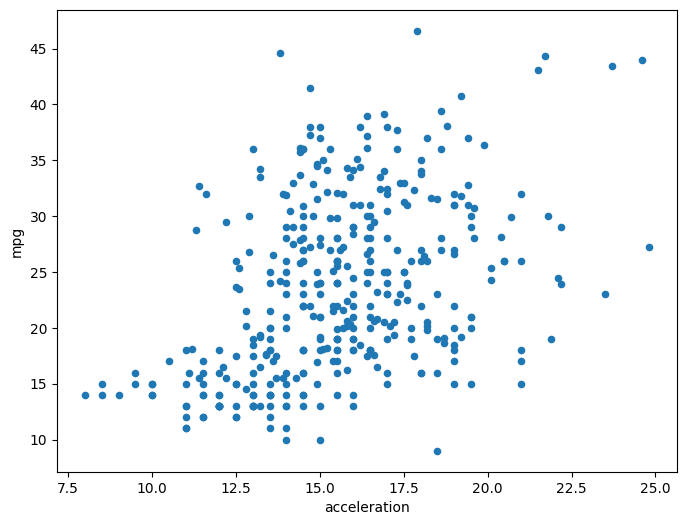

In [42]:
# Your code here

df.plot.scatter(x='acceleration', y='mpg', figsize=(8,6))
